In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '//content/mel_spectrograms.zip'
extract_path = '//content/mel_spectrograms'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the files that were extracted
extracted_files = os.listdir(extract_path)
extracted_files

['hungry', 'tired', 'burping', 'discomfort', 'belly_pain']

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
base_dir = "/content/mel_spectrograms"
train_dir = "/content/train"
test_dir = "/content/test"

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split ratio
split_ratio = 0.8

# Process each class folder in the base directory
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_path):
        print(f"Processing class: {class_name}")

        # Get all files in the current class folder
        files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        if not files:  # Skip if no files are found
            print(f"Skipping empty folder for class: {class_name}")
            continue

        # Shuffle and split the files into train and test
        train_files, test_files = train_test_split(files, train_size=split_ratio, random_state=42)

        # Create class folders in train and test directories
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Copy files to the train directory
        for file in train_files:
            src_path = os.path.join(class_path, file)
            dest_path = os.path.join(train_class_dir, file)
            shutil.copy(src_path, dest_path)

        # Copy files to the test directory
        for file in test_files:
            src_path = os.path.join(class_path, file)
            dest_path = os.path.join(test_class_dir, file)
            shutil.copy(src_path, dest_path)

print("Data successfully split into train and test folders!")


Processing class: hungry
Processing class: tired
Processing class: burping
Processing class: discomfort
Processing class: belly_pain
Data successfully split into train and test folders!


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions after resizing
img_height = 400
img_width = 1000

# Batch size
batch_size = 32

# Paths to train, validation, and test directories
train_dir = "/content/train"
test_dir = "/content/test"


In [ ]:
img_height = 400
img_width = 1000
# Batch size
batch_size = 32
# Paths to train, validation, and test directories
train_dir = "/content/train"
test_dir = "/content/test"

# ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,               # Normalize pixel values to [0, 1]
    #rotation_range=20,             # Randomly rotate images
    #width_shift_range=0.2,         # Randomly shift images horizontally
    #height_shift_range=0.2,        # Randomly shift images vertically
    #shear_range=0.2,               # Apply random shear transformations
    #zoom_range=0.2,                # Apply random zoom
   #horizontal_flip=True,          # Randomly flip images horizontally
    #validation_split=0.2,          # Reserve 20% of training data for validation
   # preprocessing_function=resize_and_pad  # Apply resize and pad
)

# ImageDataGenerator for testing (no augmentation, only normalization)
test_datagen = ImageDataGenerator(
    rescale=1.0/255,               # Normalize pixel values to [0, 1]
    #preprocessing_function=resize_and_pad  # Apply resize and pad
)

# Train data loader
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),  # Resize images to 512x512
    batch_size=batch_size,                # Batch size
    class_mode='categorical',             # Multi-class classification
    subset='training',                    # Training subset
    shuffle=True
)

# Validation data loader
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),  # Resize images to 512x512
    batch_size=batch_size,                # Batch size
    class_mode='categorical',             # Multi-class classification
    subset='validation',                  # Validation subset
    shuffle=True
)

# Test data loader
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),  # Resize images to 512x512
    batch_size=batch_size,                # Batch size
    class_mode='categorical',             # Multi-class classification
    shuffle=False
)



Found 550 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Found 140 images belonging to 5 classes.


In [ ]:
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model('/content/audio_classification_cnn.h5')

# Predict on X_test
predictions = model.predict(train_generator)  # if X_test is an array of test data

# If you're using a generator, use the generator directly
# predictions = model.predict(train_generator, steps=len(train_generator))

# Print or use the predictions as needed
print(predictions)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 116s 6s/step
[[1.6224785e-06 1.0205667e-05 2.5024281e-08 9.9994916e-01 3.8930390e-05]
 [4.6412711e-06 5.3737068e-07 3.6140978e-08 3.2225641e-06 9.9999148e-01]
 [6.7915728e-08 2.0196678e-06 2.6712142e-08 9.9999326e-01 4.5779461e-06]
 ...
 [4.6776091e-08 5.1654672e-05 6.7711508e-09 9.9994445e-01 3.7936541e-06]
 [4.1131649e-09 2.1734770e-08 9.6279109e-09 9.9999940e-01 5.7930350e-07]
 [2.2882985e-07 3.4266932e-06 3.6555520e-08 9.9995029e-01 4.6020279e-05]]


In [ ]:
print(len(predictions))

550


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
# Load train and test datasets
train_data = pd.read_csv('/content/train_mfcc_features (1).csv')  # Update with actual path
test_data = pd.read_csv('/content/test_mfcc_features (1).csv')    # Update with actual path


In [ ]:
# Separate features and labels for train data
X_train = train_data.iloc[:, :-1].values  # All columns except 'label'
y_train = train_data['label'].values      # 'label' column

# Separate features and labels for test data
X_test = test_data.iloc[:, :-1].values  # All columns except 'label'
y_test = test_data['label'].values      # 'label' column


In [ ]:
# Calculate shift mean using NumPy
shift_mean_train = np.mean(np.diff(X_train, axis=1), axis=1).reshape(-1, 1)
shift_mean_test = np.mean(np.diff(X_test, axis=1), axis=1).reshape(-1, 1)

# Calculate RMS mean using NumPy
rms_mean_train = np.sqrt(np.mean(X_train ** 2, axis=1)).reshape(-1, 1)
rms_mean_test = np.sqrt(np.mean(X_test ** 2, axis=1)).reshape(-1, 1)

# Append shift mean and RMS mean as new features to X_train and X_test
X_train = np.hstack((X_train, shift_mean_train, rms_mean_train))
X_test = np.hstack((X_test, shift_mean_test, rms_mean_test))


In [ ]:
# Encode labels as integers for categorical cross-entropy
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
# Convert labels to categorical format for neural network output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Reshape X data to fit Conv1D input shape (samples, timesteps, features)
# We assume 20 features (18 MFCCs + 2 extra features: shift mean and RMS mean)
X_train_reshaped = X_train.reshape(-1, 20, 1)
X_test_reshaped = X_test.reshape(-1, 20, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Split train data into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=42)

# Print shapes to verify the split
print(f"Training data shape: {X_train_reshaped.shape}")
#print(f"Validation data shape: {X_val.shape}")
print(f"Training labels shape: {X_test_reshaped.shape}")
#print(f"Validation labels shape: {y_val.shape}")


Training data shape: (550, 20, 1)
Training labels shape: (140, 20, 1)


In [ ]:
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model('/content/my_model.h5')

# Predict on X_test
predictions_2 = model.predict(X_train_reshaped)  # if X_test is an array of test data

# If you're using a generator, use the generator directly
# predictions = model.predict(train_generator, steps=len(train_generator))

# Print or use the predictions as needed
print(predictions_2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[2.5851205e-01 2.1481608e-01 2.2383653e-01 2.9963912e-03 2.9983896e-01]
 [9.3515563e-01 2.9608019e-02 7.5125634e-03 6.5101841e-03 2.1213442e-02]
 [9.8840505e-01 1.3966721e-03 9.2830007e-05 1.5146222e-03 8.5906917e-03]
 ...
 [2.6402393e-01 2.2608052e-01 2.7205846e-01 3.1126621e-03 2.3472439e-01]
 [7.9276407e-04 6.3993200e-04 9.8708665e-01 3.7473908e-03 7.7331075e-03]
 [2.1837126e-02 3.0477080e-04 9.2594624e-01 2.3513973e-02 2.8397936e-02]]


In [ ]:
print(len(predictions_2))

550


In [ ]:
print(len(y_train))

550


In [ ]:
# # Set weights for CNN model predictions
# w1 = 0.6  # Weight for CNN Model 1
# w2 = 0.4  # Weight for CNN Model 2

In [ ]:
from tensorflow.keras.layers import concatenate

meta_features = np.concatenate([predictions,predictions_2], axis=1)
# meta_features =(w1 * predictions) + (w2 * predictions_2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

meta_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
meta_classifier.fit(meta_features, y_train )

RandomForestClassifier(random_state=42)

In [ ]:
model1 = tf.keras.models.load_model('/content/audio_classification_cnn.h5')
model2 = tf.keras.models.load_model('/content/my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

test_predictions1= model1.predict(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 10s/step


In [ ]:
print(len(test_predictions1))
#print(test_predictions1)


140


In [ ]:
test_predictions2 = model2.predict(X_test_reshaped)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
print(len(test_predictions2))
#print(test_predictions2)

140


In [ ]:
meta_test_features = np.concatenate([test_predictions1,test_predictions2], axis=1)
# meta_test_features =(w1 * test_predictions1) + (w2 * test_predictions2)

In [ ]:
meta_preds = meta_classifier.predict(meta_test_features)


In [ ]:
#print(y_test)

In [ ]:
#print(meta_preds)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, meta_preds)
print(f"Accuracy of Meta Model: {accuracy * 100:.2f}%")

Accuracy of Meta Model: 69.29%


In [ ]:
meta_preds = np.argmax(meta_preds, axis=1)  # Converts from one-hot to single-label
y_test = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded


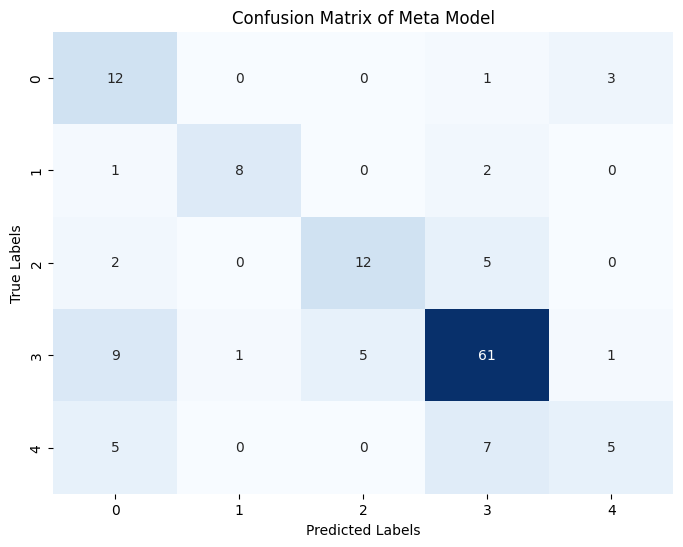

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, meta_preds)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Meta Model")
plt.show()

In [ ]:
import pickle

# Save the meta model
filename = 'meta_classifier.pkl'
with open(filename, 'wb') as file:
    pickle.dump(meta_classifier, file)

print(f"Meta-model saved as {filename}")


Meta-model saved as meta_classifier.pkl
